The following additional libraries are needed to run this
notebook. Note that running on Colab is experimental, please report a Github
issue if you have any problem.

In [ ]:
!pip install -U mxnet-cu101mkl==1.6.0  # updating mxnet to at least v1.6
!pip install git+https://github.com/d2l-ai/d2l-en # installing d2l


# The Image Classification Dataset
:label:`sec_fashion_mnist`

One of the widely used dataset for image classification is the  MNIST dataset :cite:`LeCun.Bottou.Bengio.ea.1998`.
While it had a good run as a benchmark dataset,
even simple models by today's standards achieve classification accuracy over 95%
making it unsuitable for distinguishing between stronger models and weaker ones.
Today, MNIST serves as more of sanity checks than as a benchmark.
To up the ante just a bit, we will focus our discussion in the coming sections
on the qualitatively similar, but comparatively complex Fashion-MNIST
dataset :cite:`Xiao.Rasul.Vollgraf.2017`, which was released in 2017.

```eval_rst

.. raw:: html

    <div class="mdl-tabs mdl-js-tabs mdl-js-ripple-effect"><div class="mdl-tabs__tab-bar text"><a href="#mxnet-1-0" class="mdl-tabs__tab is-active">mxnet</a><a href="#pytorch-1-1" class="mdl-tabs__tab ">pytorch</a></div>
```

```eval_rst
.. raw:: html

    <div class="mdl-tabs__panel is-active" id="mxnet-1-0">
```

In [1]:
%matplotlib inline
from d2l import mxnet as d2l
from mxnet import gluon
import sys

d2l.use_svg_display()

```eval_rst
.. raw:: html

    </div>
```

```eval_rst
.. raw:: html

    <div class="mdl-tabs__panel " id="pytorch-1-1">
```

In [1]:
%matplotlib inline
from d2l import torch as d2l
import torch
import torchvision
from torchvision import transforms
from torch.utils import data
import sys
d2l.use_svg_display()

```eval_rst
.. raw:: html

    </div>
```

```eval_rst
.. raw:: html

    </div>
```

## Getting the Dataset

We can download and load the FashionMNIST dataset into memory via the the build-in functions in the framework.

```eval_rst

.. raw:: html

    <div class="mdl-tabs mdl-js-tabs mdl-js-ripple-effect"><div class="mdl-tabs__tab-bar text"><a href="#mxnet-3-0" class="mdl-tabs__tab is-active">mxnet</a><a href="#pytorch-3-1" class="mdl-tabs__tab ">pytorch</a></div>
```

```eval_rst
.. raw:: html

    <div class="mdl-tabs__panel is-active" id="mxnet-3-0">
```

In [2]:
mnist_train = gluon.data.vision.FashionMNIST(train=True)
mnist_test = gluon.data.vision.FashionMNIST(train=False)

```eval_rst
.. raw:: html

    </div>
```

```eval_rst
.. raw:: html

    <div class="mdl-tabs__panel " id="pytorch-3-1">
```

In [2]:
# By default pytorch torchvision datasets are of type PIL.
# Define a transform "trans" to change the PIL to Tensor format.
trans = transforms.ToTensor()

mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)

```eval_rst
.. raw:: html

    </div>
```

```eval_rst
.. raw:: html

    </div>
```

FashionMNIST consists of images from 10 categories, each represented
by 6k images in the training set and by 1k in the test set.
Consequently the training set and the test set
contain 60k and 10k images, respectively.

```eval_rst

.. raw:: html

    <div class="mdl-tabs mdl-js-tabs mdl-js-ripple-effect"><div class="mdl-tabs__tab-bar text"><a href="#mxnet-5-0" class="mdl-tabs__tab is-active">mxnet</a><a href="#pytorch-5-1" class="mdl-tabs__tab ">pytorch</a></div>
```

```eval_rst
.. raw:: html

    <div class="mdl-tabs__panel is-active" id="mxnet-5-0">
```

In [3]:
len(mnist_train), len(mnist_test)

(60000, 10000)

```eval_rst
.. raw:: html

    </div>
```

```eval_rst
.. raw:: html

    <div class="mdl-tabs__panel " id="pytorch-5-1">
```

In [3]:
len(mnist_train), len(mnist_test)

(60000, 10000)

```eval_rst
.. raw:: html

    </div>
```

```eval_rst
.. raw:: html

    </div>
```

The images in Fashion-MNIST are associated with the following categories:
t-shirt, trousers, pullover, dress, coat, sandal, shirt, sneaker, bag and ankle boot.
The following function converts between numeric label indices and their names in text.

In [4]:
def get_fashion_mnist_labels(labels):  #@save
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

We can now create a function to visualize these examples.

In [5]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):        
        if 'asnumpy' in dir(img): img = img.asnumpy() 
        if 'numpy' in dir(img): img = img.numpy()
        ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

Here are the images and their corresponding labels (in text)
for the first few examples in the training dataset.

```eval_rst

.. raw:: html

    <div class="mdl-tabs mdl-js-tabs mdl-js-ripple-effect"><div class="mdl-tabs__tab-bar text"><a href="#mxnet-7-0" class="mdl-tabs__tab is-active">mxnet</a><a href="#pytorch-7-1" class="mdl-tabs__tab ">pytorch</a></div>
```

```eval_rst
.. raw:: html

    <div class="mdl-tabs__panel is-active" id="mxnet-7-0">
```

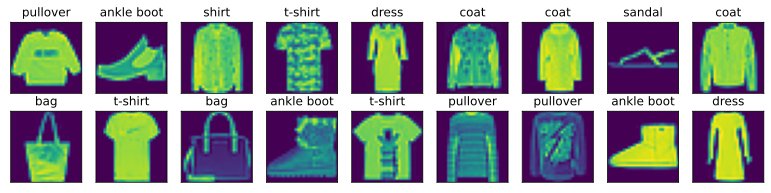

In [6]:
X, y = mnist_train[:18]
show_images(X.squeeze(axis=-1), 2, 9, titles=get_fashion_mnist_labels(y));

```eval_rst
.. raw:: html

    </div>
```

```eval_rst
.. raw:: html

    <div class="mdl-tabs__panel " id="pytorch-7-1">
```

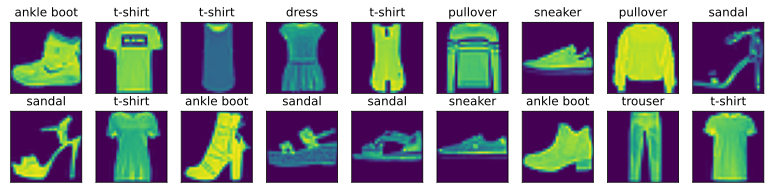

In [6]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

```eval_rst
.. raw:: html

    </div>
```

```eval_rst
.. raw:: html

    </div>
```

## Reading a Minibatch

To make our life easier when reading from the training and test sets,
we use a `DataLoader` rather than creating one from scratch,
as we did in :numref:`sec_linear_scratch`.
Recall that at each iteration, a `DataLoader`
reads a minibatch of data with size `batch_size` each time.

During training, reading data can be a significant performance bottleneck,
especially when our model is simple or when our computer is fast.
A handy feature of Gluon's `DataLoader` is the ability
to use multiple processes to speed up data reading.
For instance, we can set aside 4 processes to read the data (via `num_workers`).
Because this feature is not currently supported on Windows
the following code checks the platform to make sure
that we do not saddle our Windows-using friends
with error messages later on.

In [7]:
def get_dataloader_workers(num_workers=4):  #@save
    # 0 means no additional process is used to speed up the reading of data.
    if sys.platform.startswith('win'):
        return 0
    else:
        return num_workers

Below, we convert the image data from uint8 to 32-bit
floating point numbers using the `ToTensor` class.
Additionally, the transformer will divide all numbers by 255
so that all pixels have values between 0 and 1.
The `ToTensor` class also moves the image channel
from the last dimension to the first dimension
to facilitate the convolutional neural network calculations introduced later.
Through the `transform_first` function of the dataset,
we apply the transformation of `ToTensor`
to the first element of each instance (image and label).

```eval_rst

.. raw:: html

    <div class="mdl-tabs mdl-js-tabs mdl-js-ripple-effect"><div class="mdl-tabs__tab-bar text"><a href="#mxnet-9-0" class="mdl-tabs__tab is-active">mxnet</a><a href="#pytorch-9-1" class="mdl-tabs__tab ">pytorch</a></div>
```

```eval_rst
.. raw:: html

    <div class="mdl-tabs__panel is-active" id="mxnet-9-0">
```

In [8]:
batch_size = 256
transformer = gluon.data.vision.transforms.ToTensor()
train_iter = gluon.data.DataLoader(mnist_train.transform_first(transformer),
                                   batch_size, shuffle=True,
                                   num_workers=get_dataloader_workers())

```eval_rst
.. raw:: html

    </div>
```

```eval_rst
.. raw:: html

    <div class="mdl-tabs__panel " id="pytorch-9-1">
```

In [8]:
batch_size = 256
train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, 
                             num_workers=get_dataloader_workers())

```eval_rst
.. raw:: html

    </div>
```

```eval_rst
.. raw:: html

    </div>
```

Let us look at the time it takes to read the training data.

```eval_rst

.. raw:: html

    <div class="mdl-tabs mdl-js-tabs mdl-js-ripple-effect"><div class="mdl-tabs__tab-bar text"><a href="#mxnet-11-0" class="mdl-tabs__tab is-active">mxnet</a><a href="#pytorch-11-1" class="mdl-tabs__tab ">pytorch</a></div>
```

```eval_rst
.. raw:: html

    <div class="mdl-tabs__panel is-active" id="mxnet-11-0">
```

In [9]:
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'1.67 sec'

```eval_rst
.. raw:: html

    </div>
```

```eval_rst
.. raw:: html

    <div class="mdl-tabs__panel " id="pytorch-11-1">
```

In [9]:
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'1.85 sec'

```eval_rst
.. raw:: html

    </div>
```

```eval_rst
.. raw:: html

    </div>
```

## Putting All Things Together

Now we define the `load_data_fashion_mnist` function
that obtains and reads the Fashion-MNIST dataset.
It returns the data iterators for both the training set and validation set.
In addition, it accepts an optional argument to resize images to another shape.

```eval_rst

.. raw:: html

    <div class="mdl-tabs mdl-js-tabs mdl-js-ripple-effect"><div class="mdl-tabs__tab-bar text"><a href="#mxnet-13-0" class="mdl-tabs__tab is-active">mxnet</a><a href="#pytorch-13-1" class="mdl-tabs__tab ">pytorch</a></div>
```

```eval_rst
.. raw:: html

    <div class="mdl-tabs__panel is-active" id="mxnet-13-0">
```

In [10]:
def load_data_fashion_mnist(batch_size, resize=None):  #@save
    """Download the Fashion-MNIST dataset and then load into memory."""
    dataset = gluon.data.vision
    trans = [dataset.transforms.Resize(resize)] if resize else []
    trans.append(dataset.transforms.ToTensor())
    trans = dataset.transforms.Compose(trans)
    mnist_train = dataset.FashionMNIST(train=True).transform_first(trans)
    mnist_test = dataset.FashionMNIST(train=False).transform_first(trans)
    return (gluon.data.DataLoader(mnist_train, batch_size, shuffle=True,
                                  num_workers=get_dataloader_workers()),
            gluon.data.DataLoader(mnist_test, batch_size, shuffle=False,
                                  num_workers=get_dataloader_workers()))

```eval_rst
.. raw:: html

    </div>
```

```eval_rst
.. raw:: html

    <div class="mdl-tabs__panel " id="pytorch-13-1">
```

In [10]:
def load_data_fashion_mnist(batch_size, resize=None):  #@save
    """Download the Fashion-MNIST dataset and then load into memory."""
    trans = [transforms.Resize(resize)] if resize else []
    trans.append(transforms.ToTensor())
    trans = transforms.Compose(trans)

    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

```eval_rst
.. raw:: html

    </div>
```

```eval_rst
.. raw:: html

    </div>
```

Below, we verify that image resizing works.

```eval_rst

.. raw:: html

    <div class="mdl-tabs mdl-js-tabs mdl-js-ripple-effect"><div class="mdl-tabs__tab-bar text"><a href="#mxnet-15-0" class="mdl-tabs__tab is-active">mxnet</a><a href="#pytorch-15-1" class="mdl-tabs__tab ">pytorch</a></div>
```

```eval_rst
.. raw:: html

    <div class="mdl-tabs__panel is-active" id="mxnet-15-0">
```

In [11]:
train_iter, test_iter = load_data_fashion_mnist(32, (64, 64))
for X, y in train_iter:
    print(X.shape)
    break

(32, 1, 64, 64)


```eval_rst
.. raw:: html

    </div>
```

```eval_rst
.. raw:: html

    <div class="mdl-tabs__panel " id="pytorch-15-1">
```

In [11]:
train_iter, test_iter = load_data_fashion_mnist(32, (64, 64))
for X, y in train_iter:
    print(X.shape)
    break

torch.Size([32, 1, 64, 64])


```eval_rst
.. raw:: html

    </div>
```

```eval_rst
.. raw:: html

    </div>
```

We are now ready to work with the Fashion-MNIST dataset in the sections that follow.

## Summary

* Fashion-MNIST is an apparel classification dataset consisting of images representing 10 categories.
 * We will use this dataset in subsequent sections and chapters to evaluate various classification algorithms.
* We store the shape of each image with height $h$ width $w$ pixels as $h \times w$ or `(h, w)`.
* Data iterators are a key component for efficient performance. Rely on well-implemented iterators that exploit multi-threading to avoid slowing down your training loop.

## Exercises

1. Does reducing the `batch_size` (for instance, to 1) affect read performance?
1. For non-Windows users, try modifying `num_workers` to see how it affects read performance. Plot the performance against the number of works employed.
1. Use the framework's API document website to see which other datasets are available. 



```eval_rst

.. raw:: html

    <div class="mdl-tabs mdl-js-tabs mdl-js-ripple-effect"><div class="mdl-tabs__tab-bar text"><a href="#mxnet-17-0" class="mdl-tabs__tab is-active">mxnet</a><a href="#pytorch-17-1" class="mdl-tabs__tab ">pytorch</a></div>
```

```eval_rst
.. raw:: html

    <div class="mdl-tabs__panel is-active" id="mxnet-17-0">
```

[Discussions](https://discuss.d2l.ai/t/48)

```eval_rst
.. raw:: html

    </div>
```

```eval_rst
.. raw:: html

    <div class="mdl-tabs__panel " id="pytorch-17-1">
```

[Discussions](https://discuss.d2l.ai/t/49)

```eval_rst
.. raw:: html

    </div>
```

```eval_rst
.. raw:: html

    </div>
```